<h1>Exploratory Analysis of YouTube Channels and Videos Based on Educational and Entertainment Content</h1>

# 1. Introduction | Objectives | Approach | Data Source

## 1.1. Introduction

---YouTube Background info---

YouTube had it's humble beginnings starting out in

The first video uploaded was [Me at the zoo](https://www.youtube.com/watch?v=jNQXAC9IVRw). 

---YouTube Accomplishments---

---My Motivations---

I have been utilizing YouTube as a main source of entertainment and educational content for over a decade. This is my first instance of taking a deeper look at the statistics of top content creators I have followed previously, ocassionally, or currently. This project explores the educational and entertainment content from 10-20 successful YouTube channels.


## 1.2. Objectives

The project will strengthen my understanding and explores the following:

- Learning Youtube API | Navigating documentation | Obtaining video data
- Analyzing common misconceptions of becoming <b>"successful"</b> on YouTube
- Identify trending topics through Natural Language Processing (NLP) approaches


## 1.3. Approach
1. Obtain meta data with Youtube API from 10-15 channels in entertainment and education niches
2. Cleaning raw data and develop additional features for analysis (Pandas)
3. Exploratory analysis with data visualizations (Seaborn | Matplotlib)
4. Conclusions / Findings


## 1.4. Data Source
- Existing datasets online do not have the necessary information to perform exploratory analysis in this project. Some reasons include:
  - Outdated information
- Currently YouTube API service retains information from the past 30 days. The only way
to have more statistics beyond 30 days is to continuously scrape data until the information is required in the future.
 - The downside of this approach growing collection of data


In [1]:
# Imports
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
from IPython.display import JSON


# Data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Loading environment variable
import os
from dotenv import load_dotenv
load_dotenv()

# API_Key
api_key = os.environ.get('YOUTUBE_API_KEY')


# Example list of channel IDs
CHANNEL_IDS = [
  "UCX6OQ3DkcsbYNE6H8uQQuVA",     # Mr Beast
  "UC-lHJZR3Gqxm24_Vd_AJ5Yw",     # PewDiePie
  "UCINb0wqPz-A0dV9nARjJlOQ",     # The Dodo
  "UCshoKvlZGZ20rVgazZp5vnQ",     # CaptainSparklez
  "UCY1kMZp36IQSyNx_9h4mpCg",     # Mark Rober
  "UC6nSFpj9HTCZ5t-N3Rm3-HA",     # Vsauce
  "UCiDJtJKMICpb9B1qf7qjEOA",     # Adam Savage's Tested
  "UCsXVk37bltHxD1rDPwtNM8Q",     # Kurzgesagt – In a Nutshell
  "UCAL3JXZSzSm8AlZyD3nQdBA",     # Primitive Technology
]

SMALL_CHANNEL_IDS = [
  "UCX6OQ3DkcsbYNE6H8uQQuVA",     # Mr Beast
  "UCY1kMZp36IQSyNx_9h4mpCg",     # Mark Rober
  "UC6nSFpj9HTCZ5t-N3Rm3-HA",     # Vsauce
  "UCsXVk37bltHxD1rDPwtNM8Q",     # Kurzgesagt – In a Nutshell
  "UCAL3JXZSzSm8AlZyD3nQdBA",     # Primitive Technology
]


# Example playlist of all videos 
# ****Helpful -- (replace "UC" string from beginning of Channel Id with "UU")****
# https://www.youtube.com/playlist?list=
PLAYLIST_IDS = [
  'UUX6OQ3DkcsbYNE6H8uQQuVA'                # Mr Beast
  'PLoSWVnSA9vG9qV0CVCpg5WwEy3LiP7udY',     # Mr Beast (new uploads)
  'UULF-lHJZR3Gqxm24_Vd_AJ5Yw',             # PewDiePie
  'UUINb0wqPz-A0dV9nARjJlOQ',               # The Dodo
  'UUshoKvlZGZ20rVgazZp5vnQ',               # CaptainSparklez
  "UUY1kMZp36IQSyNx_9h4mpCg",               # Mark Rober
  "UU6nSFpj9HTCZ5t-N3Rm3-HA",               # Vsauce
  "UUiDJtJKMICpb9B1qf7qjEOA",               # Adam Savage's Tested
]

SMALL_PLAYLIST_IDS = [
  'UUX6OQ3DkcsbYNE6H8uQQuVA'                # Mr Beast
  'PLLoPYaJqlcK623-8kR0vVuwW_vaR2k1zE',               # The Dodo faith restored
  "UUY1kMZp36IQSyNx_9h4mpCg",               # Mark Rober
  "UU6nSFpj9HTCZ5t-N3Rm3-HA",               # Vsauce
]

api_service_name = "youtube"
api_version = "v3"
youtube = build(api_service_name, api_version, developerKey=api_key)

## Obtaining Basic Channel Stats
Looking at immediate/common information

In [2]:
def get_channel_stats(youtube, SMALL_CHANNEL_IDS):
  all_channel_data = []

  # https://developers.google.com/youtube/v3/docs/channels/list
  request = youtube.channels().list(
    part = 'snippet, contentDetails, statistics',
    id= ','.join(SMALL_CHANNEL_IDS)
  )
  response = request.execute()

  # https://developers.google.com/youtube/v3/docs/channels
  for item in response['items']:
    data = {
      'channelName': item['snippet']['title'],
      'creationDate': item['snippet']['publishedAt'],
      'subscribers': item['statistics']['subscriberCount'],
      'channelViews': item['statistics']['viewCount'],
      'totalVideos': item['statistics']['videoCount'],
      'playlistId': item['contentDetails']['relatedPlaylists']['uploads'],
    }

    all_channel_data.append(data)

  return(pd.DataFrame(all_channel_data))


In [3]:
quick_test_channels_stats = get_channel_stats(youtube, SMALL_CHANNEL_IDS)
quick_test_channels_stats

,channelName,creationDate,subscribers,channelViews,totalVideos,playlistId
0,Kurzgesagt – In a Nutshell,2013-07-09T20:17:20Z,21100000,2439446653,191,UUsXVk37bltHxD1rDPwtNM8Q
1,Primitive Technology,2015-05-01T23:35:46Z,10800000,1109089544,70,UUAL3JXZSzSm8AlZyD3nQdBA
2,Vsauce,2007-07-30T20:43:33Z,19800000,3133597753,478,UU6nSFpj9HTCZ5t-N3Rm3-HA
3,Mark Rober,2011-10-20T06:17:58Z,25500000,3815083203,122,UUY1kMZp36IQSyNx_9h4mpCg
4,MrBeast,2012-02-20T00:43:50Z,183000000,32102302392,751,UUX6OQ3DkcsbYNE6H8uQQuVA


## Obtaining Video IDs
This step is crucial as it narrows down where to focus on. Before collecting video Ids, we need to obtain a playlist Id.

On YouTube, an owner's channel has the liberty to create a playlist of videos they have uploaded or videos uploaded by other channels. In this analysis, we will use the default playlist "all uploads". We can obtain this playlist Id by swapping the beginning of the channel Id "UC" with "UU" [<b>REFER TO CELL 1 ABOVE</b>]

Sometimes we do not want all video uploads playlist. Instead, we can use other playlists granted if owner created or not privated them.
<br>*---Important: Channel owner can create a playlist of videos that are not uploaded by themselves / Carefully look at the uploader of video---*

After choosing a playlist, we finally proceed to obtaining video ids. Each video has its own unique id for conclusive identification. Having a playlist ensures that all the videos uploaded from the channel owner is related and theirs.


In [4]:

# ***Note: This is only needed if you want to see how many videos/video ids are in a single playlist
#playlist_id = "UUY1kMZp36IQSyNx_9h4mpCg"      # "UUY1kMZp36IQSyNx_9h4mpCg"

#------------------------------------------------------------------------------#
def get_video_ids(youtube, playlist_id):
  video_ids = []

  request = youtube.playlistItems().list(
  part='snippet,contentDetails',
  playlistId=playlist_id,
  maxResults=50       # default is 5 video ids
  )
  response = request.execute()

  for item in response['items']:
    video_ids.append(item['contentDetails']['videoId'])
  
  next_page_token = response.get('nextPageToken')
  while next_page_token is not None:
    request = youtube.playlistItems().list(
      part='snippet,contentDetails',
      playlistId=playlist_id,
      maxResults=50,       # default is 5 video ids
      pageToken = next_page_token
    )
    response = request.execute()

    for item in response['items']:
      video_ids.append(item['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')

  return video_ids

In [5]:
# video_ids = get_video_ids(youtube, playlist_id)
# len(video_ids)

## Obtaining Video Information
After collecting specific video ids, we can finally dive deeper into the videos themselves and look at the finer details

Each meta data falls under a certain category
Using the following: [--Insert link--], we are able to specify which data/item to request through the YouTube API


In [6]:

def get_video_details(youtube, video_ids):
  all_video_info = []

  for i in range(0, len(video_ids), 50):
    request = youtube.videos().list(
      part='snippet,contentDetails,statistics',
      id=','.join(video_ids[i:i+50])
    )
    response = request.execute()

    for video in response['items']:
      intended_stats = {
        'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
        'contentDetails': ['duration', 'definition', 'caption'],
        'statistics': ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
      }

      video_info = {}
      video_info['video_id'] = video['id']

      for k in intended_stats.keys():
        for v in intended_stats[k]:
          try:
            video_info[v] = video[k][v]
          except:
            video_info[v] = None

      all_video_info.append(video_info)

  return pd.DataFrame(all_video_info)

In [7]:
# This dataframe is accessible after uncommenting codes under "Obtaining Video IDs" section
# This shows all video ids in single playlist

# video_info_df = get_video_details(youtube, video_ids)
# video_info_df

In [8]:
channel_data = get_channel_stats(youtube, SMALL_CHANNEL_IDS)
channel_data

,channelName,creationDate,subscribers,channelViews,totalVideos,playlistId
0,Kurzgesagt – In a Nutshell,2013-07-09T20:17:20Z,21100000,2439446653,191,UUsXVk37bltHxD1rDPwtNM8Q
1,Primitive Technology,2015-05-01T23:35:46Z,10800000,1109089544,70,UUAL3JXZSzSm8AlZyD3nQdBA
2,Vsauce,2007-07-30T20:43:33Z,19800000,3133597753,478,UU6nSFpj9HTCZ5t-N3Rm3-HA
3,MrBeast,2012-02-20T00:43:50Z,183000000,32102302392,751,UUX6OQ3DkcsbYNE6H8uQQuVA
4,Mark Rober,2011-10-20T06:17:58Z,25500000,3815083203,122,UUY1kMZp36IQSyNx_9h4mpCg


## Appending all videos from different channels together
<p>The joy of fusing all the video data together!</p>

In [9]:

video_df = pd.DataFrame()

for c in channel_data['channelName'].unique():
	print("Getting video information from channel: " + c)
	playlist_id = channel_data.loc[channel_data['channelName']== c, 'playlistId'].iloc[0]
	video_ids = get_video_ids(youtube, playlist_id)

	# get video data
	video_data = get_video_details(youtube, video_ids)


	# append video data together and comment data toghether
	#video_df = video_df.append(video_data, ignore_index=True)
	#video_df = pd.concat([video_df, pd.DataFrame([video_data])]), ignore_index=True)
	video_df = video_df._append(video_data, ignore_index=True)


Getting video information from channel: Kurzgesagt – In a Nutshell
Getting video information from channel: Primitive Technology
Getting video information from channel: Vsauce
Getting video information from channel: MrBeast
Getting video information from channel: Mark Rober


In [10]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,duration,definition,caption,viewCount,likeCount,favoriteCount,commentCount
0,4Stzj2_Rlo4,Kurzgesagt – In a Nutshell,You're a Dream of the Universe (According to S...,To get started planning a fulfilling career th...,None,2023-09-12T14:00:06Z,PT10M16S,hd,true,3031199,190464,0,11481
1,wmP3MBjsx20,Kurzgesagt – In a Nutshell,How A Nuclear War Will Start - Minute by Minute,This video was made possible through a grant b...,None,2023-08-22T14:00:08Z,PT8M54S,hd,true,4862176,253286,0,14049
2,cFslUSyfZPc,Kurzgesagt – In a Nutshell,What Happens If You Destroy A Black Hole?,Go ‘beyond the nutshell’ at https://brilliant....,"[black hole, destroy, nuke]",2023-08-16T13:59:54Z,PT10M53S,hd,true,5454656,251698,0,10641
3,Kr57ax0OWMk,Kurzgesagt – In a Nutshell,The (Second) Deadliest Virus,Sources & further reading: https://sites.googl...,None,2023-08-08T13:59:49Z,PT11M9S,hd,true,3871410,176377,0,9182
4,28T91fgkpkA,Kurzgesagt – In a Nutshell,How Many Moons Could Earth Handle? #kurzgesagt...,"A beautiful night sky, but it comes with wild ...","[kurzgesagt_discover, inanutshell, science, sp...",2023-07-27T14:03:48Z,PT1M,hd,false,3512375,299054,0,1907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,ZaOw8B_2kWY,Mark Rober,Gorilla lured by iPhone- how-to demo,A simple trick to get you some AWESOME zoo foo...,"[Gorilla, Lured, by, iPhone, How To Video, mir...",2012-02-14T20:16:04Z,PT2M29S,hd,false,1744198,21504,0,178
1609,O1P6K_PaS0A,Mark Rober,Make a Gorilla cam- HOW TO,A simple $8 rig that takes 10 minutes and will...,"[How To Video, mirror, gorilla, iphone, monkey...",2012-02-14T19:49:49Z,PT1M27S,hd,false,407829,4756,0,205
1610,YdJr1FCB0P4,Mark Rober,Always win at heads/tails- BEST METHOD,A simple trick for flipping a coin that can en...,"[flip a coin, flip a quarter, tails every time...",2012-01-18T09:59:11Z,PT5M54S,hd,false,3199463,67404,0,2118
1611,7sj6Gpk3ab4,Mark Rober,Whiteboard Office Darts (using BuckyBalls),A simple alternative to using real darts and p...,"[Office, Whiteboard, darts, neoballs, zen magn...",2011-12-19T08:35:20Z,PT1M50S,hd,false,1308459,20904,0,424


## Data Pre-Process / Cleaning Up

In [11]:
# Data Types
print(video_df.dtypes)

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
duration         object
definition       object
caption          object
viewCount        object
likeCount        object
favoriteCount    object
commentCount     object
dtype: object


In [12]:
# Null Values
print(video_df.isnull().any())

video_id         False
channelTitle     False
title            False
description      False
tags              True
publishedAt      False
duration         False
definition       False
caption          False
viewCount         True
likeCount         True
favoriteCount    False
commentCount      True
dtype: bool


In [13]:
# Converting the following table headers to numerical data type
# (from --- parameter part: statistics)
numeric_cols = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [14]:
# Make video duration more clear (days / hour:minute:seconds)
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x :isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

video_df[['duration', 'durationSecs']]

,duration,durationSecs
0,PT10M16S,0 days 00:10:16
1,PT8M54S,0 days 00:08:54
2,PT10M53S,0 days 00:10:53
3,PT11M9S,0 days 00:11:09
4,PT1M,0 days 00:01:00
...,...,...
1608,PT2M29S,0 days 00:02:29
1609,PT1M27S,0 days 00:01:27
1610,PT5M54S,0 days 00:05:54
1611,PT1M50S,0 days 00:01:50


In [15]:
# Create "day" and "month" columns based on publish date
video_df['dayPublished'] = pd.to_datetime(video_df['publishedAt']).dt.strftime('%a')
video_df['monthPublished'] = pd.to_datetime(video_df['publishedAt']).dt.strftime('%b')

In [16]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,duration,definition,caption,viewCount,likeCount,favoriteCount,commentCount,durationSecs,dayPublished,monthPublished
0,4Stzj2_Rlo4,Kurzgesagt – In a Nutshell,You're a Dream of the Universe (According to S...,To get started planning a fulfilling career th...,None,2023-09-12T14:00:06Z,PT10M16S,hd,true,3031199.0,190464.0,0.0,11481.0,0 days 00:10:16,Tue,Sep
1,wmP3MBjsx20,Kurzgesagt – In a Nutshell,How A Nuclear War Will Start - Minute by Minute,This video was made possible through a grant b...,None,2023-08-22T14:00:08Z,PT8M54S,hd,true,4862176.0,253286.0,0.0,14049.0,0 days 00:08:54,Tue,Aug
2,cFslUSyfZPc,Kurzgesagt – In a Nutshell,What Happens If You Destroy A Black Hole?,Go ‘beyond the nutshell’ at https://brilliant....,"[black hole, destroy, nuke]",2023-08-16T13:59:54Z,PT10M53S,hd,true,5454656.0,251698.0,0.0,10641.0,0 days 00:10:53,Wed,Aug
3,Kr57ax0OWMk,Kurzgesagt – In a Nutshell,The (Second) Deadliest Virus,Sources & further reading: https://sites.googl...,None,2023-08-08T13:59:49Z,PT11M9S,hd,true,3871410.0,176377.0,0.0,9182.0,0 days 00:11:09,Tue,Aug
4,28T91fgkpkA,Kurzgesagt – In a Nutshell,How Many Moons Could Earth Handle? #kurzgesagt...,"A beautiful night sky, but it comes with wild ...","[kurzgesagt_discover, inanutshell, science, sp...",2023-07-27T14:03:48Z,PT1M,hd,false,3512375.0,299054.0,0.0,1907.0,0 days 00:01:00,Thu,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,ZaOw8B_2kWY,Mark Rober,Gorilla lured by iPhone- how-to demo,A simple trick to get you some AWESOME zoo foo...,"[Gorilla, Lured, by, iPhone, How To Video, mir...",2012-02-14T20:16:04Z,PT2M29S,hd,false,1744198.0,21504.0,0.0,178.0,0 days 00:02:29,Tue,Feb
1609,O1P6K_PaS0A,Mark Rober,Make a Gorilla cam- HOW TO,A simple $8 rig that takes 10 minutes and will...,"[How To Video, mirror, gorilla, iphone, monkey...",2012-02-14T19:49:49Z,PT1M27S,hd,false,407829.0,4756.0,0.0,205.0,0 days 00:01:27,Tue,Feb
1610,YdJr1FCB0P4,Mark Rober,Always win at heads/tails- BEST METHOD,A simple trick for flipping a coin that can en...,"[flip a coin, flip a quarter, tails every time...",2012-01-18T09:59:11Z,PT5M54S,hd,false,3199463.0,67404.0,0.0,2118.0,0 days 00:05:54,Wed,Jan
1611,7sj6Gpk3ab4,Mark Rober,Whiteboard Office Darts (using BuckyBalls),A simple alternative to using real darts and p...,"[Office, Whiteboard, darts, neoballs, zen magn...",2011-12-19T08:35:20Z,PT1M50S,hd,false,1308459.0,20904.0,0.0,424.0,0 days 00:01:50,Mon,Dec


## Exploratory Analysis
### Most Views based on all uploaded videos

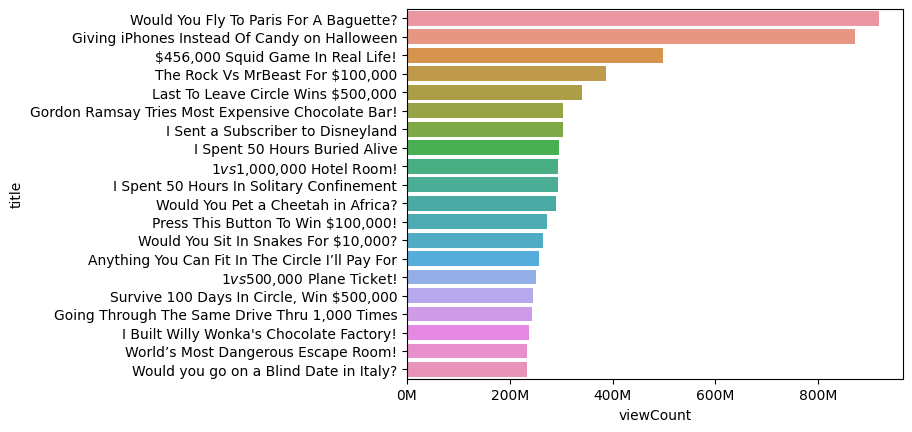

In [17]:
ax1 = sns.barplot(x='viewCount', y='title', data=video_df.sort_values('viewCount', ascending=False)[0:20])
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'{:,.0f}'.format(y/1000000) + 'M'))
plt.show()

- MrBeast dominates the view counts by a significant margin
- The top 20 YouTube videos/shorts surpass 200 Million views!!!

## YouTube Shorts
These days social media platforms take inspiration from other platforms; 
giving rise to YouTube adopting TikTok's short form video content.
The original "TikTok" was essentially "Vine" which allowed users to create clips up to 5 seconds. 
At the time, this unique constraint pushed the boundary of creativity and give rise to new popular content creators

At most, "shorts" videos are around 60 seconds. In this case, 70 seconds will be the benchmark to capture all YouTube shorts videos.

In [18]:
video_df_shorts = video_df[video_df['durationSecs'].dt.total_seconds() < 70]
video_df_shorts

,video_id,channelTitle,title,description,tags,publishedAt,duration,definition,caption,viewCount,likeCount,favoriteCount,commentCount,durationSecs,dayPublished,monthPublished
4,28T91fgkpkA,Kurzgesagt – In a Nutshell,How Many Moons Could Earth Handle? #kurzgesagt...,"A beautiful night sky, but it comes with wild ...","[kurzgesagt_discover, inanutshell, science, sp...",2023-07-27T14:03:48Z,PT1M,hd,false,3512375.0,299054.0,0.0,1907.0,0 days 00:01:00,Thu,Jul
5,4TlyzKBm5yw,Kurzgesagt – In a Nutshell,What If You’re in Space without a Spacesuit? #...,How horrible of a scenario do you want to be? ...,"[kurzgesagt_discover, inanutshell, science, sp...",2023-07-20T14:00:03Z,PT55S,hd,false,1790272.0,140626.0,0.0,1550.0,0 days 00:00:55,Thu,Jul
6,kblSnj0p6bE,Kurzgesagt – In a Nutshell,What Happens if Earth Suddenly Stops Rotating?...,"You don't even realize how fast Earth rotates,...",None,2023-07-13T14:00:34Z,PT58S,hd,false,1932260.0,174734.0,0.0,1721.0,0 days 00:00:58,Thu,Jul
7,FPKRFw2jrnU,Kurzgesagt – In a Nutshell,Earth's Hidden Gem: The Astonishing Diversity ...,So far only 17% of all species estimated to li...,"[kurzgesagt, in a nutshell, why, nature, scien...",2023-07-06T14:00:12Z,PT43S,hd,false,717408.0,55723.0,0.0,353.0,0 days 00:00:43,Thu,Jul
9,8Ey3_9N089k,Kurzgesagt – In a Nutshell,The Next Atomic Bomb Is Made of DNA #kurzgesag...,A breathtaking scientific revolution is taking...,"[kurzgesagt, kurzgesagt in a nutshell, in a nu...",2023-07-02T13:00:05Z,PT54S,hd,false,1307109.0,89415.0,0.0,1062.0,0 days 00:00:54,Sun,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,DPaWiXZmcb4,Mark Rober,Physics vs The Table Cloth Trick @CrunchLabs,7 out of 8 ain't bad.,None,2022-11-25T22:35:20Z,PT31S,hd,false,4243372.0,177018.0,0.0,782.0,0 days 00:00:31,Fri,Nov
1508,zAwo5RqhXB4,Mark Rober,I Tricked These Trick-Or-Treaters @CrunchLabs...,This is why no one ever picks Trick.,None,2022-10-30T14:58:28Z,PT44S,hd,false,6317035.0,351112.0,0.0,2510.0,0 days 00:00:44,Sun,Oct
1593,gaSv12OKVJA,Mark Rober,NASA Pumpkin Carving Contest,Annual section 352 Pumpkin Carving contest at ...,None,2013-11-01T11:43:31Z,PT1M2S,hd,false,2708352.0,11508.0,0.0,281.0,0 days 00:01:02,Fri,Nov
1607,7i8gzfoqqIg,Mark Rober,5 EPIC pranks in 60 seconds,5 EPIC pranks I have either personally carried...,"[pranks, epic pranks, prank, funny, gag, crick...",2012-03-26T15:57:58Z,PT1M1S,hd,true,3507902.0,63704.0,0.0,1743.0,0 days 00:01:01,Mon,Mar


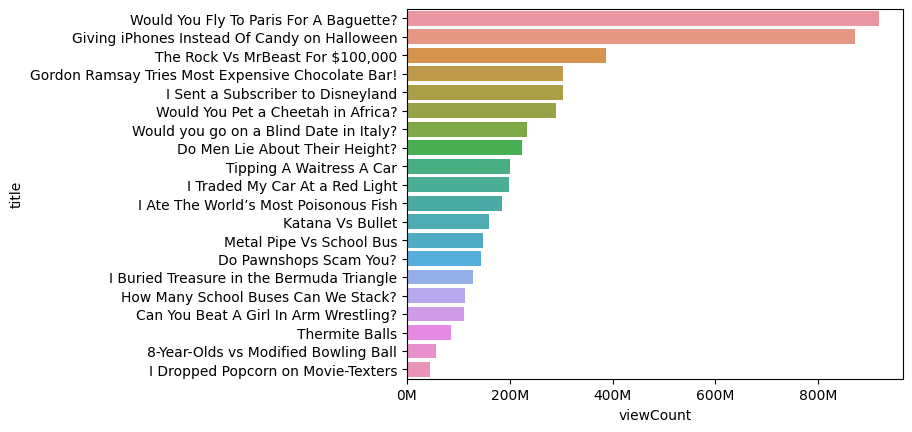

In [19]:
ax1 = sns.barplot(x='viewCount', y='title', data=video_df_shorts.sort_values('viewCount', ascending=False)[0:20])
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'{:,.0f}'.format(y/1000000) + 'M'))
plt.show()